In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/housing_data.csv")

In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


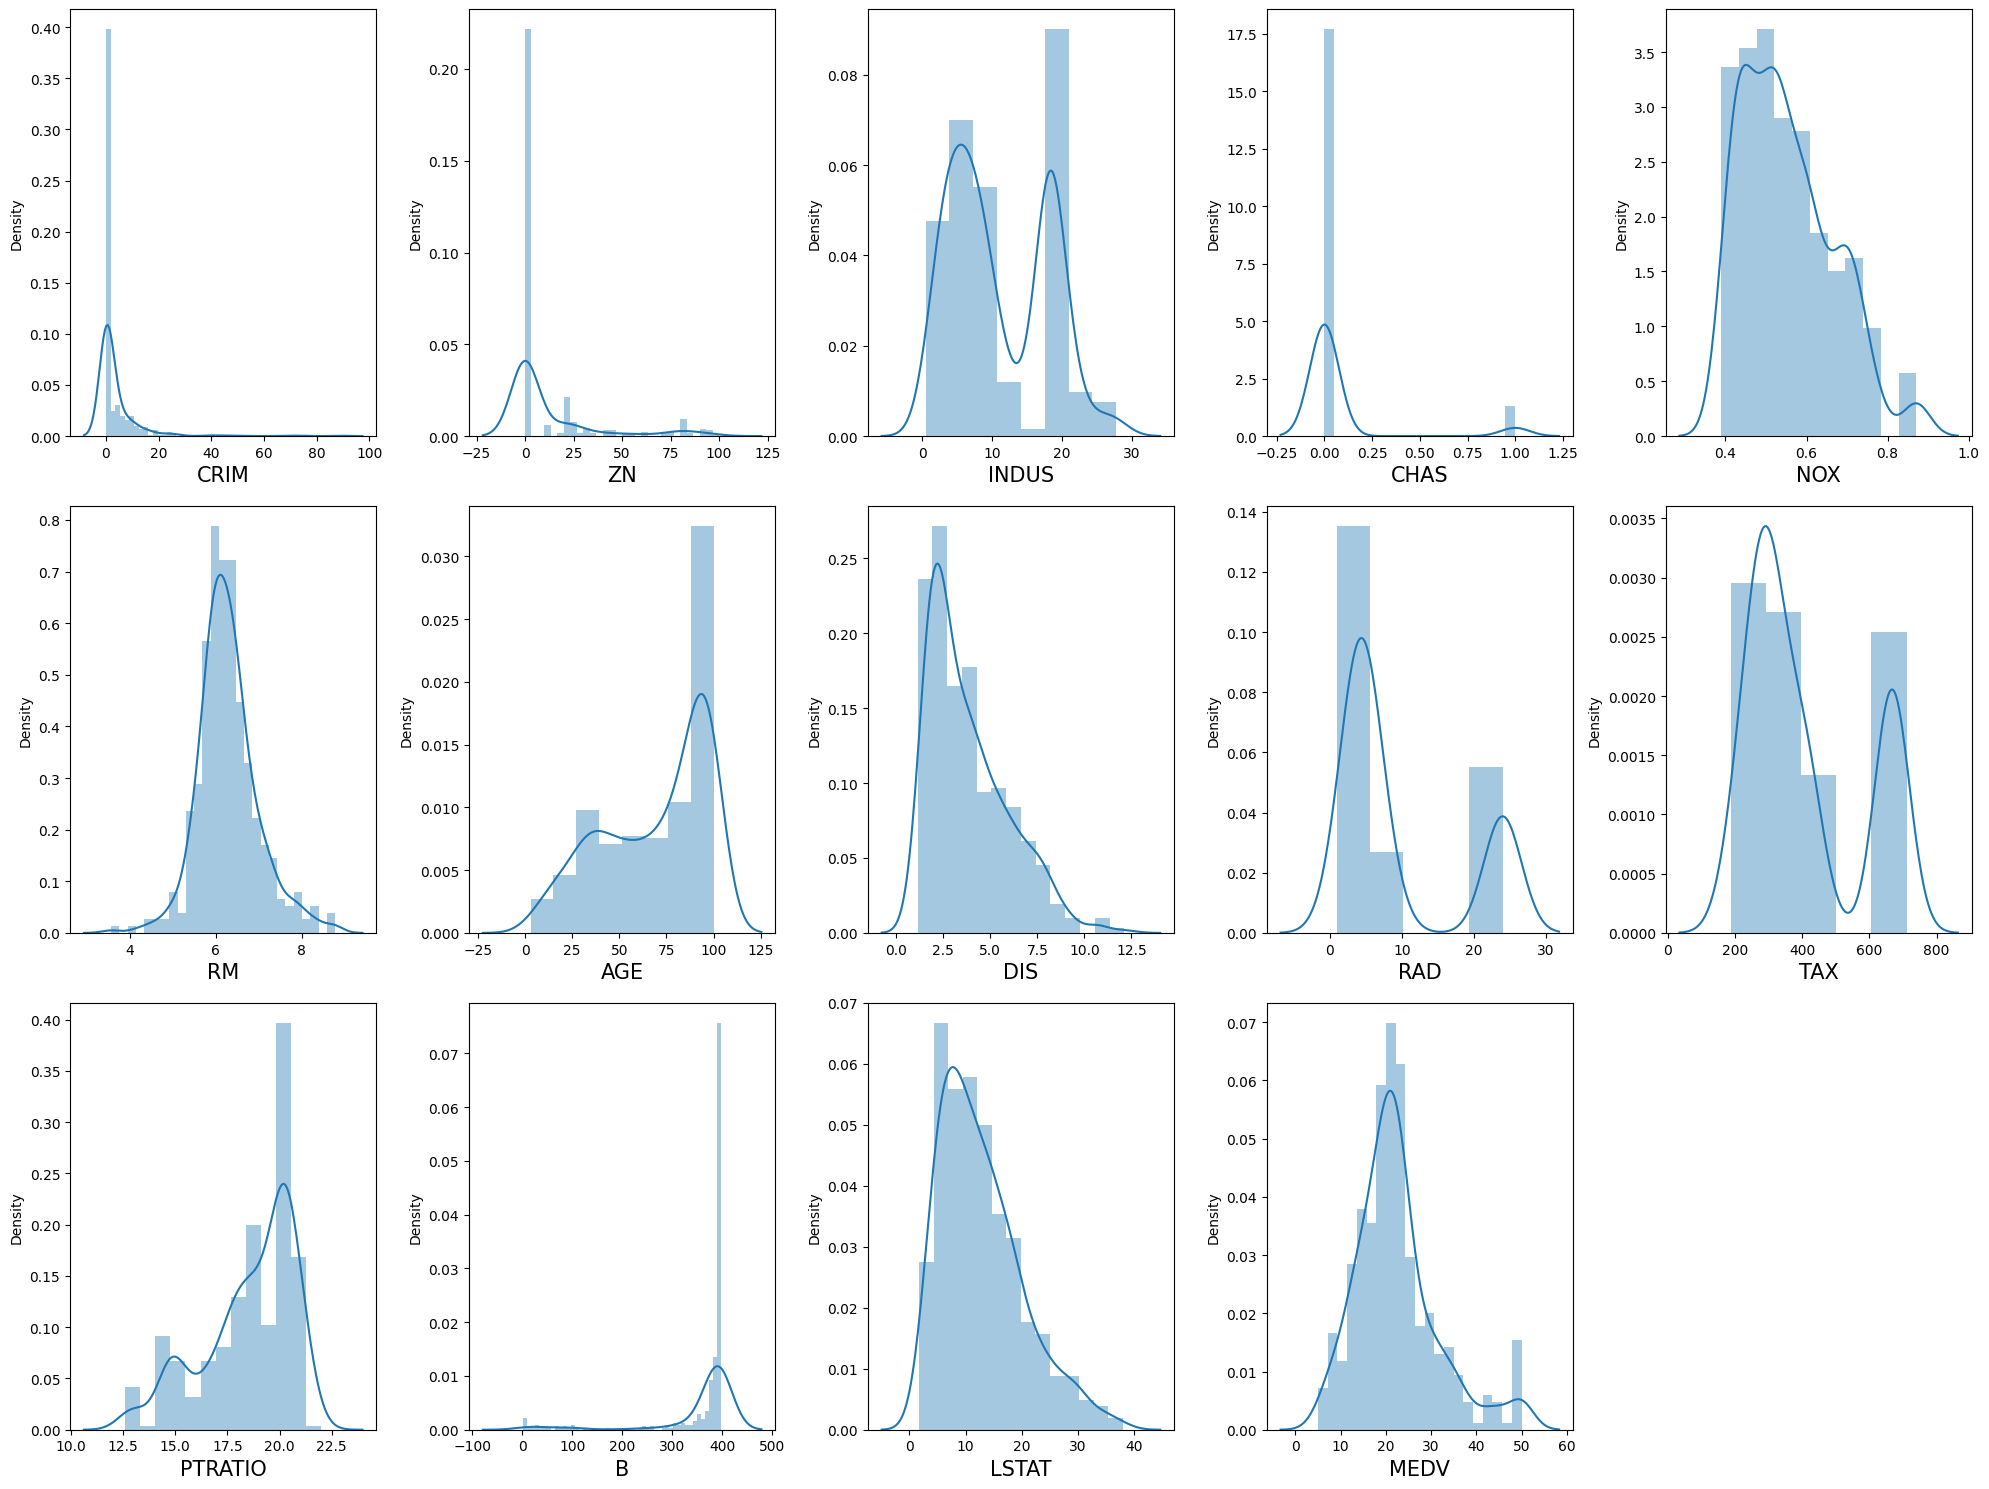

In [7]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 15)
    
    plotnumber += 1
    
plt.tight_layout()
plt.show()


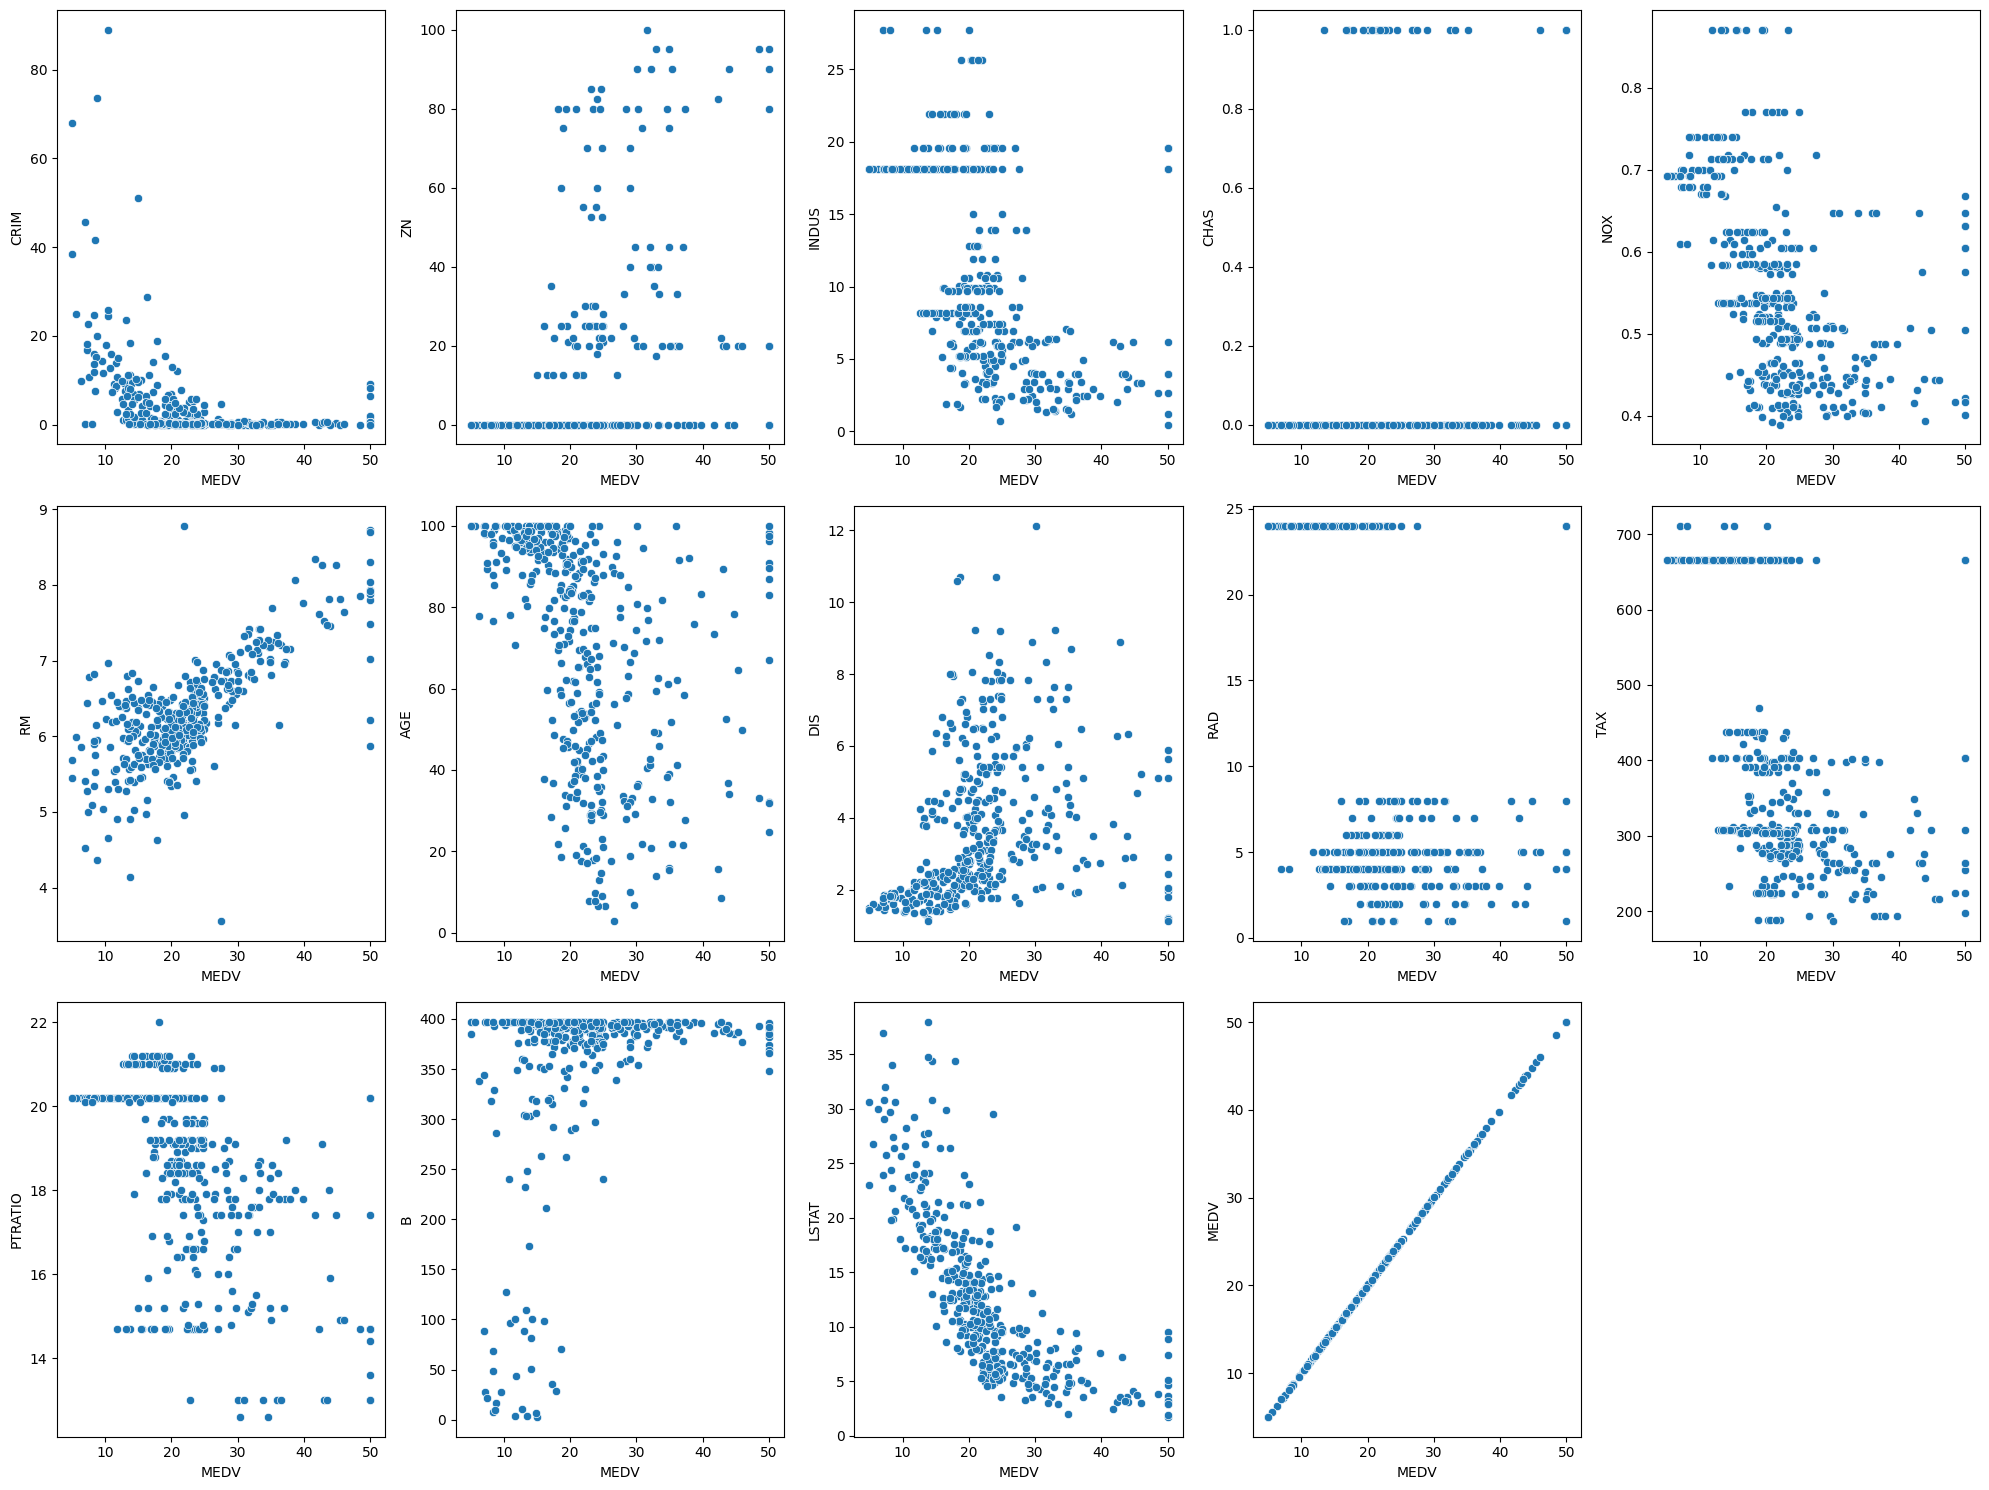

In [8]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x=df["MEDV"], y=df[column])

    plotnumber += 1

plt.tight_layout()
plt.show()

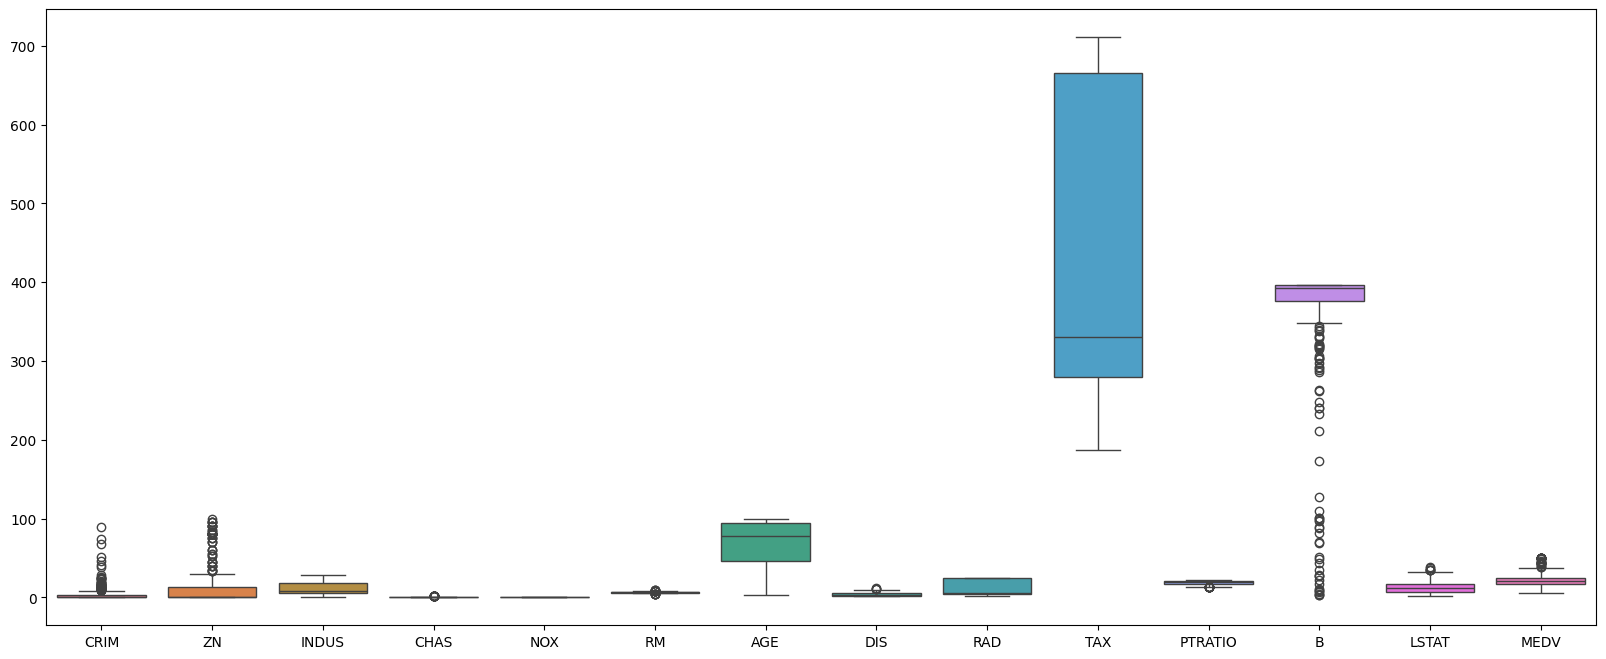

In [9]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, width=0.8)
plt.show()

In [10]:
X = df.drop(["MEDV"], axis=1)
y = df["MEDV"]

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled

array([[-0.40081837,  0.27334191, -1.25962   , ..., -1.49630294,
         0.43074011, -1.06712587],
       [-0.39853454, -0.47905119, -0.56972405, ..., -0.3408793 ,
         0.43074011, -0.49719648],
       [-0.39853672, -0.47905119, -0.56972405, ..., -0.3408793 ,
         0.38509692, -1.19727801],
       ...,
       [-0.3965804 , -0.47905119,  0.13466553, ...,  1.13806296,
         0.43074011, -0.50541662],
       [-0.39489501, -0.47905119,  0.13466553, ...,  1.13806296,
         0.43074011, -0.97670438],
       [-0.38958205, -0.47905119,  0.13466553, ...,  1.13806296,
         0.39204993, -0.86162248]], shape=(394, 13))

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

vif

,VIF,Features
0,1.741404,CRIM
1,2.321843,ZN
2,4.049690,INDUS
3,1.069182,CHAS
4,4.495772,NOX
5,2.107004,RM
6,3.173844,AGE
7,3.827427,DIS
8,6.986683,RAD
9,8.651382,TAX


In [14]:
X.drop(columns=["TAX"], axis=1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64


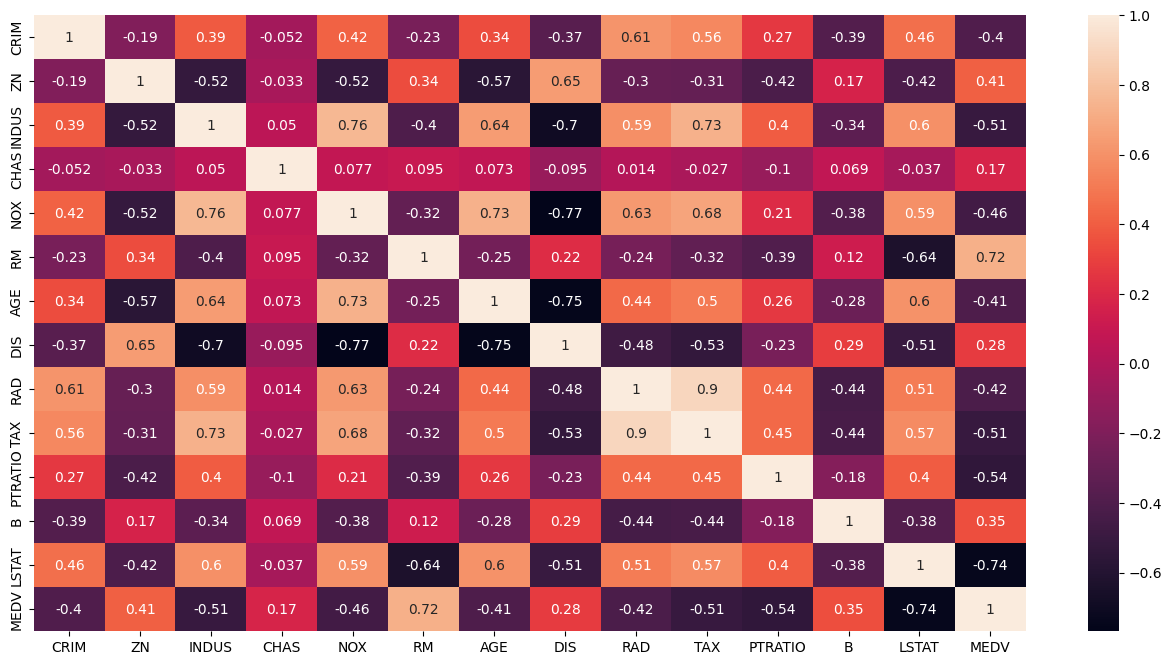

In [17]:
fig, ax = plt.subplots(figsize= (16, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [18]:
import statsmodels.formula.api as smf 

lm = smf.ols(formula="MEDV ~ RAD", data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     82.34
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           5.63e-18
Time:                        17:08:43   Log-Likelihood:                -1392.9
No. Observations:                 394   AIC:                             2790.
Df Residuals:                     392   BIC:                             2798.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.5087      0.620     42.730      0.000      25.289      27.728
RAD           -0.4412      0.049     -9.074      0.000      -0.537      -0.346
==============================================================================
Omnibus:                      115.467   Durbin-Watson:                   0.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.340
Skew:                           1.469   Prob(JB):                     4.42e-60
Kurtosis:                       5.832   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lm = smf.ols(formula="MEDV ~ TAX", data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     137.0
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           2.43e-27
Time:                        17:09:30   Log-Likelihood:                -1371.4
No. Observations:                 394   AIC:                             2747.
Df Residuals:                     392   BIC:                             2755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.5943      1.039     32.340      0.000      31.552      35.637
TAX           -0.0276      0.002    -11.704      0.000      -0.032      -0.023
==============================================================================
Omnibus:                      135.771   Durbin-Watson:                   0.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.870
Skew:                           1.630   Prob(JB):                     4.89e-86
Kurtosis:                       6.647   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
df.drop(columns="RAD", axis=1, inplace=True)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred = lr.predict(X_test)

In [24]:
lr.score(X_train, y_train)

0.7927657852108867

In [26]:
lr.score(X_test, y_test)

0.687341164461565

In [27]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2

In [28]:
print(adj_r2(X_train, y_train, lr))

0.7824437745125784


In [38]:
X_train = scaler.fit_transform(X_train)


In [40]:
from sklearn.linear_model import Lasso, LassoCV


lasso_cv = LassoCV(alphas=None, cv=10, max_iter=100_000)
lasso_cv.fit(X_train, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,None
,fit_intercept,True
,precompute,'auto'
,max_iter,100000
,tol,0.0001
,copy_X,True
,cv,10
,verbose,False
,n_jobs,None


In [41]:
alpha = lasso_cv.alpha_
alpha

np.float64(0.0348998598913001)

In [43]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

,alpha,np.float64(0.0348998598913001)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [44]:
lasso.score(X_train, y_train)

0.7920968328360294

In [45]:
lasso.score(X_test, y_test)

-4195.2178967004465

In [46]:
print(adj_r2(X_train, y_train, lasso))

0.7817415026707741


In [47]:
print(adj_r2(X_test, y_test, lasso))

-4714.74963629193


## ARRUMAR ISSO AQUI TUDO ^^^^